In [2]:
import pandas as pd

In [3]:
general_data = "./resources/general_data.csv"
employee_survey = "./resources/employee_survey_data.csv"
manager_survey = "./resources/manager_survey_data.csv"

general_df = pd.read_csv(general_data)
employee_df = pd.read_csv(employee_survey)
manager_df = pd.read_csv(manager_survey)

In [4]:
general_df = general_df.set_index("EmployeeID")
employee_df = employee_df.set_index("EmployeeID")
manager_df = manager_df.set_index("EmployeeID")

In [5]:
general_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
employee_df.columns

Index(['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'], dtype='object')

In [7]:
manager_df.columns

Index(['JobInvolvement', 'PerformanceRating'], dtype='object')

We want to see how often workers change jobs. Looking at attrition and the number of companies the workers have previously worked at and seeing how that impacts metrics such as job performance and satisfaction.

In [8]:
# The employee dataframe contains self reported information about employees regarding job satisfaction
# The manager dataframe contains information on employee performance

# We join both of the dataframes together on EmployeeID

companies_df = employee_df.join(manager_df, on="EmployeeID")

In [9]:
# We want to join the previous two dataframes with the NumCompaniesWorked and Attrition columns
# from the general employee data

companies_df = companies_df.join(general_df[["NumCompaniesWorked", "Attrition"]],on="EmployeeID")

In [10]:
# Some rows are missing data, so we drop them

companies_df = companies_df.dropna()

In [11]:
companies_df

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,NumCompaniesWorked,Attrition
EmployeeID,,,,,,,
1,3.0,4.0,2.0,3,3,1.0,No
2,3.0,2.0,4.0,2,4,0.0,Yes
3,2.0,2.0,1.0,3,3,1.0,No
4,4.0,4.0,3.0,2,3,3.0,No
5,4.0,1.0,3.0,3,3,4.0,No
...,...,...,...,...,...,...,...
4405,3.0,4.0,3.0,2,3,1.0,No
4406,4.0,1.0,3.0,3,3,3.0,No
4407,4.0,4.0,3.0,2,3,2.0,No


In [12]:
# Double check the counts to make sure that all columns are filled

companies_df.count()

EnvironmentSatisfaction    4308
JobSatisfaction            4308
WorkLifeBalance            4308
JobInvolvement             4308
PerformanceRating          4308
NumCompaniesWorked         4308
Attrition                  4308
dtype: int64

,NumCompaniesWorked
Attrition,
No,2.644697
Yes,2.938307


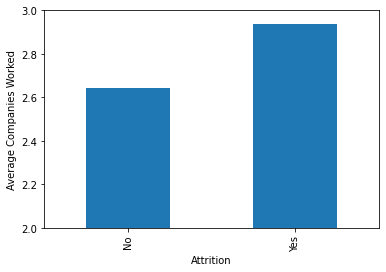

In [25]:
# We can see here that employees that attrit (quit) work for more companies on average

companies_df[["Attrition", "NumCompaniesWorked"]].groupby("Attrition").mean().plot(kind="bar", legend=False, ylabel="Average Companies Worked", ylim=[2,3])
companies_df[["Attrition", "NumCompaniesWorked"]].groupby("Attrition").mean()

,JobSatisfaction
Attrition,
No,2.775408
Yes,2.466284


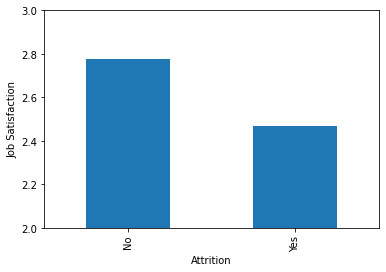

In [24]:
# Employees that quit show lower job satisfaction

companies_df[["Attrition", "JobSatisfaction"]].groupby("Attrition").mean().plot(kind="bar", legend=False, ylabel="Job Satisfaction", ylim=[2,3])
companies_df[["Attrition", "JobSatisfaction"]].groupby("Attrition").mean()

,WorkLifeBalance
Attrition,
No,2.780116
Yes,2.665710


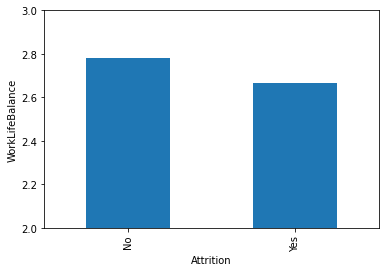

In [23]:
# Employees that quit report a lower work/life balance, although the difference is not as great as job satisfaction

companies_df[["Attrition", "WorkLifeBalance"]].groupby("Attrition").mean().plot(kind="bar", legend=False, ylabel="WorkLifeBalance", ylim=[2,3])
companies_df[["Attrition", "WorkLifeBalance"]].groupby("Attrition").mean()

,JobInvolvement
Attrition,
No,2.732484
Yes,2.705882


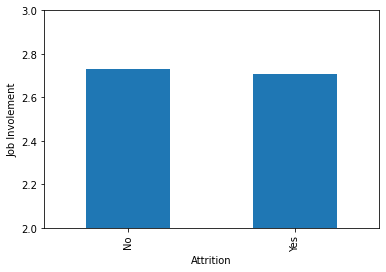

In [20]:
# Job involement has little impact on attrition

companies_df[["Attrition", "JobInvolvement"]].groupby("Attrition").mean().plot(kind="bar", legend=False, ylabel="Job Involement", ylim=[2,3])
companies_df[["Attrition", "JobInvolvement"]].groupby("Attrition").mean()

,EnvironmentSatisfaction
Attrition,
No,2.774024
Yes,2.466284


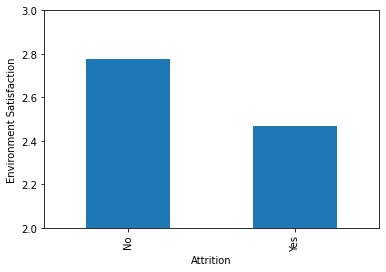

In [22]:
# Environment satisfaction seems to have a significant impact on attrition rate

companies_df[["Attrition", "EnvironmentSatisfaction"]].groupby("Attrition").mean().plot(kind="bar", legend=False, ylabel="Environment Satisfaction", ylim=[2,3])
companies_df[["Attrition", "EnvironmentSatisfaction"]].groupby("Attrition").mean()

,PerformanceRating
Attrition,
No,3.150097
Yes,3.175036


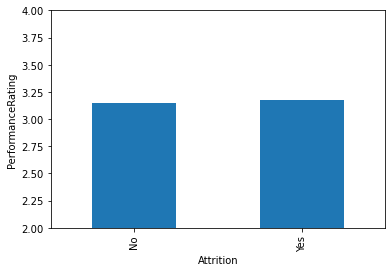

In [17]:
# It also seems that attrition has little to no impact on performance rating

companies_df[["Attrition", "PerformanceRating"]].groupby("Attrition").mean().plot(kind="bar", legend=False, ylabel="PerformanceRating", ylim=[2,4])
companies_df[["Attrition", "PerformanceRating"]].groupby("Attrition").mean()

<AxesSubplot:ylabel='Attrition'>

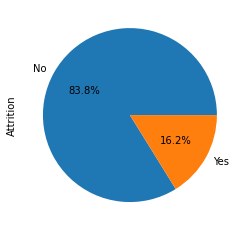

In [29]:
# Only 16% of employees in the dataset have quit

companies_df[["Attrition", "JobSatisfaction"]].groupby("Attrition").count().plot(kind="pie", y="JobSatisfaction", ylabel="Attrition", autopct='%1.1f%%', legend=False)

<AxesSubplot:xlabel='Number of Companies Worked', ylabel='Average Job Satisfaction'>

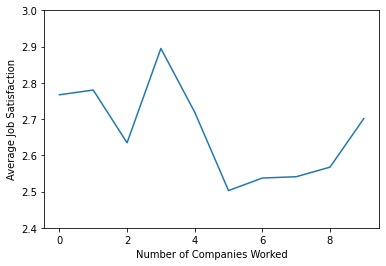

In [26]:
# Breaking down job satisfaction based on number of companies worked it seems that employees that have
# worked at 4 or less companies tend to be more satisfied with their jobs

companies_df[["JobSatisfaction", "NumCompaniesWorked"]].groupby("NumCompaniesWorked").mean().plot(kind="line", legend=False, ylim=[2.4,3], xlabel="Number of Companies Worked", ylabel="Average Job Satisfaction")

<AxesSubplot:xlabel='Number of Companies Worked', ylabel='Work/Life Balance'>

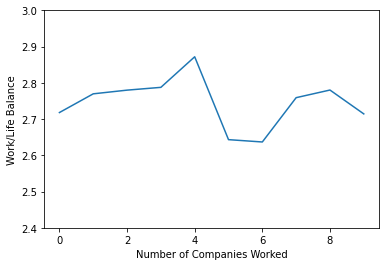

In [27]:
# It appears that employees that have worked at more than 4 companies report worse work/life balance than those
# who work for 4 or less.

companies_df[["WorkLifeBalance", "NumCompaniesWorked"]].groupby("NumCompaniesWorked").mean().plot(kind="line", legend=False, ylim=[2.4,3], xlabel="Number of Companies Worked", ylabel="Work/Life Balance")

<AxesSubplot:xlabel='Number of Companies Worked', ylabel='Job Performance'>

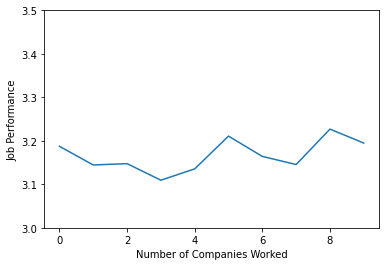

In [28]:
# Job permance rating seems to be faily regular accross the board

companies_df[["PerformanceRating", "NumCompaniesWorked"]].groupby("NumCompaniesWorked").mean().plot(kind="line", legend=False, ylim=[3,3.5], xlabel="Number of Companies Worked", ylabel="Job Performance")

<AxesSubplot:ylabel='Number of Companies Worked'>

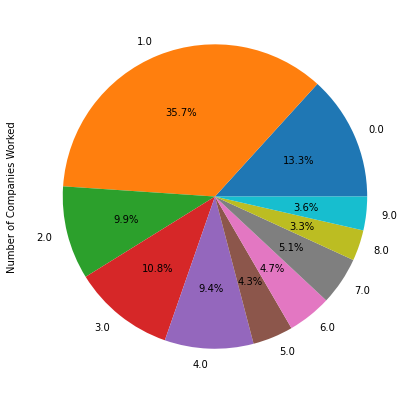

In [70]:
# A plurality of employees have only worked for 1 previous employeer, with most employees working for 2 or less

companies_df[["JobSatisfaction", "NumCompaniesWorked"]].groupby("NumCompaniesWorked").count().plot(kind="pie", y='JobSatisfaction', autopct='%1.1f%%', legend=False, ylabel="Number of Companies Worked", figsize=[7,7])